In [2]:
from pynq import Overlay, MMIO
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the bitstream
ol = Overlay("./design_1.bit")

# Define the BRAM base address and size
bram_base_address = 0xA0000000
bram_size = 2230000 #262144  

# Create an MMIO instance for the BRAM
bram = MMIO(bram_base_address, bram_size)

# Define the image dimensions
image_width = 400
image_height = 384

# Read the BRAM content and extract the 12-bit RGB pixels
pixels = []
for i in range(0, bram_size, 4):
    data = bram.read(i)
    if i < 64:  # Print the first few data points for debugging
        print(f"Address {i:#010x}: Data {data:#010x}")
    # Extract the 12-bit RGB pixel (stored in the LSB 12 bits of 32-bit data)
    r = (data >> 8) & 0xF
    g = (data >> 4) & 0xF
    b = data & 0xF
    # Convert 12-bit RGB (4:4:4) to 24-bit RGB (8:8:8)
    #r = (r << 4) | r
    #g = (g << 4) | g
    #b = (b << 4) | b
    pixels.append((r, g, b))

# Convert the list of pixels to a NumPy array and reshape it to the original image dimensions
image_array = np.array(pixels, dtype=np.uint8).reshape((image_height, image_width, 3))

# Display the image
plt.imshow(image_array)
plt.axis('off')
plt.show()

# Save the image using PIL
image = Image.fromarray(image_array)
image.save("captured_image.png")


Address 0x00000000: Data 0x00000820
Address 0x00000004: Data 0x00000820
Address 0x00000008: Data 0x00000841
Address 0x0000000c: Data 0x00000800
Address 0x00000010: Data 0x00000800
Address 0x00000014: Data 0x00000800
Address 0x00000018: Data 0x00000800
Address 0x0000001c: Data 0x00000800
Address 0x00000020: Data 0x00000800
Address 0x00000024: Data 0x00000800
Address 0x00000028: Data 0x00000800
Address 0x0000002c: Data 0x00000800
Address 0x00000030: Data 0x00000800
Address 0x00000034: Data 0x00000800
Address 0x00000038: Data 0x00000800
Address 0x0000003c: Data 0x00000800


KeyboardInterrupt: 

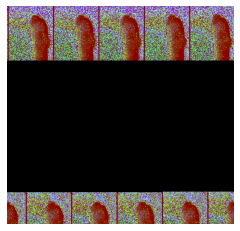

In [40]:
from pynq import Overlay, MMIO
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the bitstream
ol = Overlay("./design_1.bit")

# Define the BRAM base address and size
bram_base_address = 0xA0000000
bram_size = bram_size = 153600 * 4 #1228800  # 1.2MB

# Create an MMIO instance for the BRAM
bram = MMIO(bram_base_address, bram_size)

# Define the image dimensions
image_width = 400
image_height = 384

# Calculate the number of pixels expected
expected_pixel_count = image_width * image_height

# Read the BRAM content and extract the 12-bit RGB pixels
pixels = []
for i in range(0, bram_size, 4):
    data = bram.read(i)
    if len(pixels) >= expected_pixel_count:  # Stop reading when we have enough pixels
        break
    # Extract the 12-bit RGB pixel (stored in the LSB 12 bits of 32-bit data)
    r = (data >> 8) & 0xF
    g = (data >> 4) & 0xF
    b = data & 0xF
    # Convert 12-bit RGB (4:4:4) to 24-bit RGB (8:8:8)
    r = (r << 4) | r
    g = (g << 4) | g
    b = (b << 4) | b
    pixels.append((r, g, b))

# Ensure the number of pixels matches the expected pixel count
if len(pixels) != expected_pixel_count:
    raise ValueError(f"Number of pixels read ({len(pixels)}) does not match expected count ({expected_pixel_count})")

# Convert the list of pixels to a NumPy array and reshape it to the original image dimensions
image_array = np.array(pixels, dtype=np.uint8).reshape((image_height, image_width, 3))

# Display the image
plt.imshow(image_array)
plt.axis('off')
plt.show()

# Save the image using PIL
image = Image.fromarray(image_array)
image.save("./captured_image.png")
